# Feature Importance

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Load Previous Trained Model

In [2]:
from tensorflow.keras.models import load_model

model = load_model('../../../2_Modeling_Phase/Binary/Saved-Models/Farm-Flow_DNN-Deep-Neural-Network_Model.keras')

2024-03-19 12:14:16.863929: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-19 12:14:16.864309: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 12:14:16.866880: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 12:14:16.896056: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 12:14:17.414804: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Load Train Dataset

In [3]:
df_train = pd.read_csv("../../../0_Datasets/Farm-Flow/train.csv")

Load Test Dataset

In [4]:
df_test = pd.read_csv("../../../0_Datasets/Farm-Flow/test.csv")

In [5]:
display(df_train)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.236304,-0.662387,-0.577140,-0.443123,-0.277741,-0.268577,-0.273647,-1.394192,-0.643844,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
1,-0.672105,-0.457813,-0.577140,-0.443123,0.490111,0.504662,0.498222,0.728588,-0.643844,0.278456,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,Port_Scanning,1
2,-0.454205,-0.662387,-0.577140,-0.443123,-0.277918,-0.268577,-0.273736,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
3,2.378496,2.406229,2.285759,2.444445,-0.276874,-0.267504,-0.272675,0.728588,2.129645,-0.147053,...,-0.240860,1.678331,-0.105550,-0.268638,2.620142,2.654541,1.265201,2.728235,Normal,0
4,-0.672105,-0.457813,-0.577140,-0.443123,-0.277823,-0.268460,-0.273629,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.670339,-0.529202,-0.741186,-0.418623,MQTT_Flood,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47341,-0.454205,-0.457813,-0.577140,-0.443123,-0.276776,-0.267991,-0.272869,-0.332802,-0.483062,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.329944,-0.419418,-0.741186,-0.418623,TCP_Flood,1
47342,-0.454205,-0.662387,-0.577140,-0.443123,-0.277509,-0.268577,-0.273530,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
47343,2.160596,1.997080,2.285759,2.444445,-0.276943,-0.267646,-0.272781,0.576960,1.928668,-0.147053,...,-0.240860,1.678331,-0.054762,-0.267306,0.275202,0.312477,-0.072391,0.630330,Normal,0
47344,1.288996,1.383357,1.713179,0.711904,-0.265775,-0.256330,-0.261520,0.728588,2.330623,1.129475,...,-0.250326,0.400251,-0.238680,-0.346375,1.485493,1.556699,0.470671,0.378581,Normal,0


In [6]:
display(df_test)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.672105,-0.457813,-0.577140,-0.443123,-0.276940,-0.267571,-0.272742,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,MQTT_Flood,1
1,-0.672105,-0.457813,-0.577140,-0.443123,-0.277181,-0.267813,-0.272983,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,MQTT_Flood,1
2,-0.454205,-0.457813,-0.577140,-0.443123,-0.276909,-0.268058,-0.272969,-0.332802,-0.483062,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.329944,-0.419418,-0.741186,-0.418623,TCP_Flood,1
3,2.378496,2.406229,2.285759,2.444445,-0.276907,-0.267537,-0.272708,0.728588,2.129645,-0.147053,...,-0.240860,1.678331,-0.105550,-0.268638,2.620142,2.654541,1.265201,2.728235,Normal,0
4,-0.454205,-0.253238,-0.004560,-0.443123,-0.276892,-0.267522,-0.272693,0.728588,-0.241889,1.129475,...,-0.477522,-0.635539,-0.408378,-0.455263,-0.329944,-0.199849,-0.596727,-0.418623,HTTP_Flood,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15778,1.942696,2.201655,2.285759,2.444445,-0.277003,-0.267561,-0.272768,0.891878,1.727690,-0.147053,...,-0.240860,1.678331,-0.054762,-0.267306,0.691239,0.897993,0.262007,1.154806,Arp_Spoofing,1
15779,2.160596,2.201655,2.285759,2.444445,-0.276991,-0.267622,-0.272793,0.728588,1.928668,-0.147053,...,-0.240860,1.678331,-0.072901,-0.267431,2.393212,2.434972,1.265201,2.728235,Normal,0
15780,-0.236304,-0.662387,-0.577140,-0.443123,-0.277906,-0.268577,-0.273730,-1.394192,-0.643844,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
15781,-0.454205,-0.662387,-0.577140,-0.443123,-0.277687,-0.268577,-0.273620,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1


-----
## Train and Test Datasets

Drop Multiclass Column

In [7]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

Excluding the target variable

In [8]:
X_columns = df_train.columns.drop('is_attack')

Create a feature matrix X by selecting only the columns specified in X_columns. Then convert the selected data into a NumPy array.

In [9]:
X = df_train[X_columns].values

Creates a target variable y containing the target variable

In [10]:
y = df_train["is_attack"].values

Split into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Get Features Names and Class Names

In [12]:
feature_names = list(X_columns)
class_names = ["Normal", "Malicious"]
response_dict = {0: 'Normal', 1: 'Malicious'}

Generate Prediction

In [13]:
pred = model.predict(X_test)

370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


Labeled Df's

In [14]:
X_test_labeled = pd.DataFrame(X_test, columns=feature_names)
X_train_labeled = pd.DataFrame(X_train, columns=feature_names)

# Since both are one-dimensional NumPy arrays
pred_series = pd.Series(pred.flatten())
y_test_target_series = pd.Series(y_test)
y_train_target_series = pd.Series(y_train)

Create a subset of the Train DF for faster training

In [15]:
subset_percentage = 0.1
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, test_size=1 - subset_percentage, stratify=y_train)

In [16]:
subset_percentage = 0.1
X_subset_labeled, _, y_subset_labeled, _ = train_test_split(X_train_labeled, y_train_target_series, test_size=1 - subset_percentage, stratify=y_train_target_series)

Row to explain

In [17]:
idx = 0

---

## Neural Network

In [18]:
weights = model.get_weights()

# Extract the first layer weights
input_layer_weights = weights[0]

feature_importance = np.mean(np.abs(input_layer_weights), axis=1)
df_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

df_feature_importance

,Feature,Importance
0,fwd_data_pkts_tot,0.207963
1,fwd_pkts_per_sec,0.201862
2,flow_pkts_payload.tot,0.181800
3,fwd_subflow_pkts,0.173536
4,fwd_header_size_tot,0.169094
5,bwd_pkts_per_sec,0.166349
6,bwd_header_size_min,0.165323
7,bwd_header_size_max,0.164696
8,bwd_subflow_pkts,0.163403
9,bwd_pkts_tot,0.162437


## Imodels

In [19]:
import imodels
from imodels import FIGSClassifier

#model_figs = FIGSClassifier(max_rules=7, max_trees=3)
#model_figs.fit(X_test_labeled, y_test_target_series, feature_names=feature_names)

dfp_importance = pd.DataFrame({'feat_names': feature_names})
dfp_importance['feature'] = dfp_importance.index
dfp_importance_gini = pd.DataFrame({'importance_gini': feature_importance})
dfp_importance_gini['feature'] = dfp_importance_gini.index
dfp_importance_gini['importance_gini_pct'] = dfp_importance_gini['importance_gini'].rank(pct=True)
dfp_importance = pd.merge(dfp_importance, dfp_importance_gini, on='feature', how='left')
dfp_importance = dfp_importance.sort_values(by=['importance_gini', 'feature'], ascending=[False, True]).reset_index(drop=True)
display(dfp_importance)

,feat_names,feature,importance_gini,importance_gini_pct
0,fwd_data_pkts_tot,2,0.207963,1.000000
1,fwd_pkts_per_sec,4,0.201862,0.969697
2,flow_pkts_payload.tot,26,0.181800,0.939394
3,fwd_subflow_pkts,29,0.173536,0.909091
4,fwd_header_size_tot,8,0.169094,0.878788
5,bwd_pkts_per_sec,5,0.166349,0.848485
6,bwd_header_size_min,12,0.165323,0.818182
7,bwd_header_size_max,13,0.164696,0.787879
8,bwd_subflow_pkts,30,0.163403,0.757576
9,bwd_pkts_tot,1,0.162437,0.727273


## Shap

/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/tqdm/std.py:465: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  if rate and total else datetime.utcfromtimestamp(0))
PermutationExplainer explainer: 100%|████████████████████████████████████████████████████████████████████████████▉| 11836/11837 [06:15<00:00, 32.75it/s]/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/tqdm/std.py:465: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware 

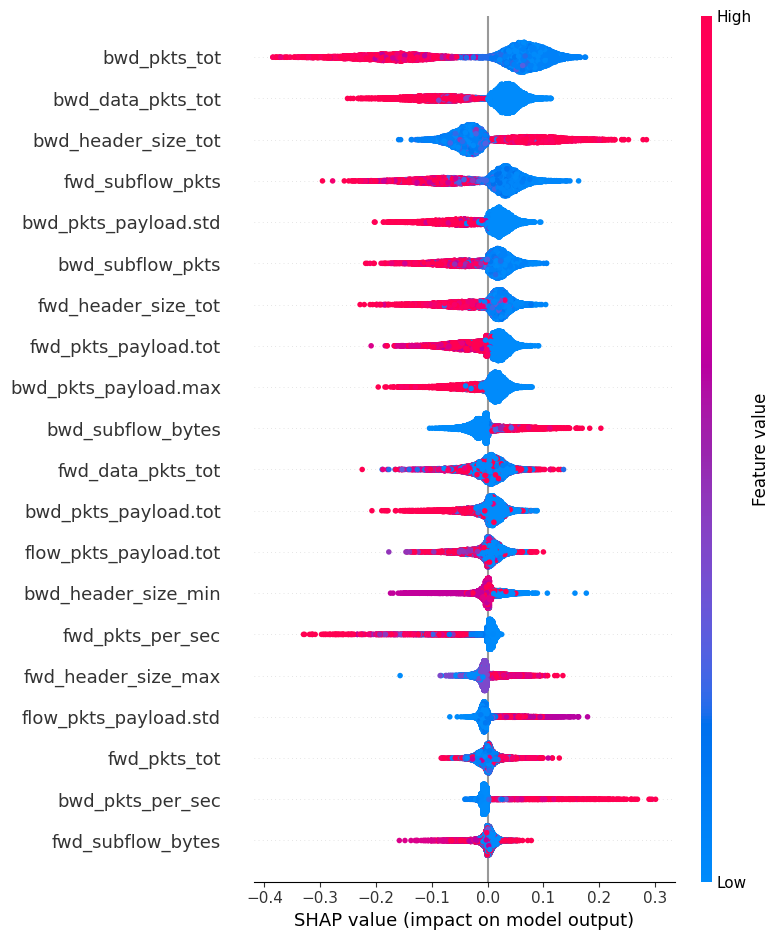

In [20]:
import shap

masker = shap.maskers.Independent(X_subset)

explainer = shap.Explainer(model, masker=masker)
#explainer = shap.KernelExplainer(model, data=X_subset)
#explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test_labeled)

shap.summary_plot(shap_values, X_test_labeled,feature_names=feature_names,class_names=class_names)

## Shapash

## InterpretML

## LOFO

In [24]:
from lofo import LOFOImportance, Dataset, plot_importance
from sklearn.model_selection import KFold

target_name = "is_attack"

column_names = feature_names + [target_name]

combined_data = np.column_stack((X_test_labeled, y_test_target_series))
combined_df = pd.DataFrame(combined_data, columns=column_names)

# define the validation scheme
cv = KFold(n_splits=4, shuffle=False, random_state=None) # Don't shuffle to keep the time split split validation

# define the binary target and the features
dataset = Dataset(df=combined_df, target="is_attack", features=[col for col in combined_df.columns if col != "is_attack"])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc")

# get the mean and standard deviation of the importances in pandas format
importance = lofo_imp.get_importance()

importance

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3216
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3249
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 31
[LightGBM] [Inf

/home/ivoafonsobispo/miniconda3/lib/python3.12/site-packages/tqdm/std.py:465: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  if rate and total else datetime.utcfromtimestamp(0))
  0%|                                                                                                                            | 0/33 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2980
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3012
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


  3%|███▌                                                                                                                | 1/33 [00:00<00:08,  3.60it/s]

[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2985
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3180
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843


  6%|███████                                                                                                             | 2/33 [00:00<00:08,  3.63it/s]

[LightGBM] [Info] Number of positive: 6161, number of negative: 2717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3145
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693963 -> initscore=0.818711
[LightGBM] [Info] Start training from score 0.818711
[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3186
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Numb

  9%|██████████▌                                                                                                         | 3/33 [00:00<00:08,  3.64it/s]

[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3018
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6161, number of negative: 2717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2952
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693963 -> initscore=0.818711


 12%|██████████████                                                                                                      | 4/33 [00:01<00:07,  3.67it/s]

[LightGBM] [Info] Total Bins 2973
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3216
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing co

 15%|█████████████████▌                                                                                                  | 5/33 [00:01<00:07,  3.62it/s]

[LightGBM] [Info] Number of positive: 6161, number of negative: 2717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3181
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693963 -> initscore=0.818711
[LightGBM] [Info] Start training from score 0.818711
[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3222
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Numb

 18%|█████████████████████                                                                                               | 6/33 [00:01<00:07,  3.62it/s]

[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2994
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Info] Number of positive: 6161, number of negative: 2717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2926
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693963 -> initscore=0.818711
[LightGBM] [Info] Start training from score 0.818711
[LightGBM] [Info] Numb

 21%|████████████████████████▌                                                                                           | 7/33 [00:01<00:07,  3.63it/s]

[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3116
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3188
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] N

 24%|████████████████████████████                                                                                        | 8/33 [00:02<00:06,  3.70it/s]

[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3193
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3208
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] N

 27%|███████████████████████████████▋                                                                                    | 9/33 [00:02<00:06,  3.71it/s]

[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3214
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3207
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] N

 30%|██████████████████████████████████▊                                                                                | 10/33 [00:02<00:06,  3.73it/s]

[LightGBM] [Info] Total Bins 3172
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693963 -> initscore=0.818711
[LightGBM] [Info] Start training from score 0.818711
[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3213
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tota

 33%|██████████████████████████████████████▎                                                                            | 11/33 [00:02<00:05,  3.76it/s]

[LightGBM] [Info] Number of positive: 6161, number of negative: 2717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3150
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693963 -> initscore=0.818711
[LightGBM] [Info] Start training from score 0.818711
[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3191
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Numb

 36%|█████████████████████████████████████████▊                                                                         | 12/33 [00:03<00:05,  3.79it/s]

[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3217
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6161, number of negative: 2717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3152
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693963 -> initscore=0.818711


 39%|█████████████████████████████████████████████▎                                                                     | 13/33 [00:03<00:05,  3.83it/s]

[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3249
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6161, number of negative: 2717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3181
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 31
[Lig

 42%|████████████████████████████████████████████████▊                                                                  | 14/33 [00:03<00:05,  3.78it/s]

[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3235
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6161, number of negative: 2717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3168
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[Lig

 45%|████████████████████████████████████████████████████▎                                                              | 15/33 [00:04<00:04,  3.81it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3173
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3207
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Warning] N

 48%|███████████████████████████████████████████████████████▊                                                           | 16/33 [00:04<00:04,  3.87it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3209
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3242
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 52%|███████████████████████████████████████████████████████████▏                                                       | 17/33 [00:04<00:04,  3.90it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3202
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3235
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 55%|██████████████████████████████████████████████████████████████▋                                                    | 18/33 [00:04<00:03,  3.89it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3208
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3241
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 58%|██████████████████████████████████████████████████████████████████▏                                                | 19/33 [00:05<00:03,  3.90it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3208
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3241
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Warning] N

 61%|█████████████████████████████████████████████████████████████████████▋                                             | 20/33 [00:05<00:03,  3.91it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3111
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3138
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Warning] N

 64%|█████████████████████████████████████████████████████████████████████████▏                                         | 21/33 [00:05<00:03,  3.91it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3209
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3242
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 67%|████████████████████████████████████████████████████████████████████████████▋                                      | 22/33 [00:05<00:02,  3.89it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2979
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3010
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 70%|████████████████████████████████████████████████████████████████████████████████▏                                  | 23/33 [00:06<00:02,  3.84it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3197
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3230
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 73%|███████████████████████████████████████████████████████████████████████████████████▋                               | 24/33 [00:06<00:02,  3.81it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2961
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2994
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014
[LightGBM] [Info] Start training from score 0.840014
[LightGBM] [Warning] N

 76%|███████████████████████████████████████████████████████████████████████████████████████                            | 25/33 [00:06<00:02,  3.83it/s]

[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2988
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6201, number of negative: 2677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3019
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.698468 -> initscore=0.840014


 79%|██████████████████████████████████████████████████████████████████████████████████████████▌                        | 26/33 [00:06<00:01,  3.80it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2995
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info

 82%|██████████████████████████████████████████████████████████████████████████████████████████████                     | 27/33 [00:07<00:01,  3.84it/s]

[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3202
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3177
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Info] Numb

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 28/33 [00:07<00:01,  3.82it/s]

[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3184
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2977
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] N

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████              | 29/33 [00:07<00:01,  3.84it/s]

[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2983
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2990
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 30/33 [00:07<00:00,  3.86it/s]

[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2996
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3198
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] N

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 31/33 [00:08<00:00,  3.82it/s]

[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3204
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Number of positive: 6185, number of negative: 2692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3191
[LightGBM] [Info] Number of data points in the train set: 8877, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.696744 -> initscore=0.831843
[LightGBM] [Info] Start training from score 0.831843
[LightGBM] [Warning] N

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 32/33 [00:08<00:00,  3.82it/s]

[LightGBM] [Info] Number of positive: 6161, number of negative: 2717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3154
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693963 -> initscore=0.818711
[LightGBM] [Info] Start training from score 0.818711
[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3199
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120
[LightGBM] [Info] Numb

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:08<00:00,  3.80it/s]

[LightGBM] [Info] Number of positive: 6161, number of negative: 2717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2951
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693963 -> initscore=0.818711
[LightGBM] [Info] Start training from score 0.818711
[LightGBM] [Info] Number of positive: 6158, number of negative: 2720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2985
[LightGBM] [Info] Number of data points in the train set: 8878, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693625 -> initscore=0.817120
[LightGBM] [Info] Start training from score 0.817120


,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
23,fwd_pkts_tot,0.000698,0.000601,0.000163,0.000043,0.001185,0.001401
18,fwd_header_size_max,0.000682,0.000595,0.000462,0.000047,0.000560,0.001658
13,fwd_data_pkts_tot,0.000624,0.000390,0.000450,0.000439,0.000314,0.001292
16,bwd_header_size_max,0.000599,0.000480,0.000417,0.000051,0.000563,0.001364
0,flow_pkts_payload.tot,0.000577,0.000374,0.000422,0.000274,0.000393,0.001217
11,bwd_subflow_pkts,0.000516,0.000391,0.000196,0.000158,0.000579,0.001131
24,fwd_pkts_per_sec,0.000507,0.000956,-0.000328,-0.000540,0.001232,0.001662
31,bwd_pkts_payload.avg,0.000445,0.000329,0.000371,-0.000006,0.000498,0.000916
9,bwd_pkts_payload.max,0.000437,0.000442,0.000307,0.000146,0.000104,0.001192
5,bwd_pkts_per_sec,0.000424,0.000608,0.000124,-0.000338,0.000604,0.001305


------
## Notes

**SHAP Values vs Permutation Importance vs Morris Sensitivity vs LOFO (Leave One Feature Out)**

1. **SHAP Values:**
- **Concept:** SHAP values are based on cooperative game theory and aim to fairly distribute the contribution of each feature to the model's prediction.
- **How it works:** It calculates the average contribution of each feature across all possible feature combinations and assigns a value to each feature, indicating its impact on the prediction.
- **Interpretation:** A positive SHAP value for a feature contributes to increasing the model's output, while a negative value indicates a contribution to decreasing the output.

2. **Permutation Importance:**
- **Concept:** Permutation Importance assesses the importance of each feature by permuting (randomly shuffling) its values and observing the change in the model's performance.
- **How it works:** It measures the decrease in model performance (e.g., accuracy) when the values of a specific feature are randomly permuted, and the larger the decrease, the more important the feature is considered.
- **Interpretation:** A higher decrease in performance suggests that the feature is crucial for the model's predictions.

3. **Morris Sensitivity:**
- **Concept:** Morris Sensitivity is a global sensitivity analysis method that assesses the impact of small variations in individual features on the model's output.
- **How it works:** It involves perturbing one feature at a time while keeping other features constant, observing how the output changes, and quantifying the sensitivity of the model to each feature.
- **Interpretation:** A higher Morris Sensitivity value indicates a greater impact of the feature on the model output.

4. **LOFO (Leave One Feature Out):**
- **Concept:** LOFO evaluates the impact of leaving out each feature one at a time on the model's performance.
- **How it works:** It systematically removes each feature, re-trains the model, and measures the change in performance metrics (e.g., accuracy, AUC) to understand the importance of each feature.
- **Interpretation:** A larger decrease in performance when a specific feature is left out suggests that the feature is more critical for the model's predictions.

**Assumptions:**
- **SHAP Values:** Assumes that features interact cooperatively.
- **Permutation Importance:** Assumes that the change in model performance is solely due to the importance of the feature.
- **Morris Sensitivity:** Assumes small variations in individual features.
- **LOFO:** Assumes that leaving out a feature impacts the model's performance.

### Q: Why are the results from the XGBoost Feature Importance different from the results of the DNN?
XGBoost relies on decision trees, where each feature's importance is determined by its contribution to the reduction in impurity (Gini) in the decision tree nodes. Results in a clear and interpretable feature importance. On the other hand, DNNs are non-linear models, making them harder to interpret.

**In cybersecurity:**

The text discusses the number of packets with payload as a common feature, and asserts that the results vary based on the type of Feature Importance algorithm used.

- **Permutation Importance:** identifies the time between each package sent as having the most influence.
- **Shap:** identifies backward communication starting with subflow or packet size as having the most influence.
- **Morris Sensitivity:** the minimum payload size has been identified as having the most influence, which is reasonable given that it is an IoT dataset and consistency in the minimum payload size is crucial.
- **LOFO:** despite being mentioned after several other features, another proposition suggests that the payload size, including the packet header size, has more influence.

Understanding each feature with XGBoost is possible, but it becomes challenging with NN due to the varying results obtained from different techniques. Nevertheless, the packet consistently yields the same result across all techniques.

This highlights the importance of considering the interpretability of models, especially when dealing with complex neural networks, and understanding that different interpretability techniques may yield divergent results. The consistency in the interpretation of the "packet" feature across various techniques adds confidence to its significance in the context of the cybersecurity dataset.